Proposing the structure of a convolutional neural network, to identify the type of images of documents, the proposed structure of the convolutional neural network includes dividing the image of the document into four main regions and passing those regions to the convolutional neural network as a sequence of single images, and the goal of this methodology is the ability to facilitate the work of The convolutional neural network is able to extract the basic characteristics included in each of the four regions, and then use the GlobalAveragePooling1D layer in order to reach the general characteristics that distinguish the document, and thus the ability of the neural network to easily find the general characteristics that characterize each type of document.

We know that the type of document is determined according to many specifications, such as the design of the document, the header and footer, the body of the document and how the writing is formatted within the document, all of these factors help in the process of identifying the type of document.

Thus, we divided into the head of the document, the bottom of the document, the body of the document and it was divided into two regions (the right body and the left body).
Using the TimeDistributed layer, we are able to pass the images to the neural network as a set of four sub-images, where the properties are extracted from each part and then the common general properties are extracted.

the References:
Adam W. Harley, A. U. (2015). Evaluation of Deep Convolutional Nets for Document Image Classification and Retrieval. Toronto, Ontario: Ryerson University. [link study](https://arxiv.org/pdf/1502.07058v1.pdf)

The study, which was my main reference, includes the same process of dividing the document into four sections, but with a difference in how to collect the common features. PCA & Conca was used in the study, while it was used in the GlobalAveragePooling1D code.

Another difference is the study used multiple convolutional neural structures for each part extracted from the images of the document, while in my notebook, one convolutional neural network was used, and the network input was considered to be 4 parts representing one complete image.

In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as op
op.download("https://www.kaggle.com/datasets/pdavpoojan/the-rvlcdip-dataset-test")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kaledhoshme
Your Kaggle Key: ··········


100%|██████████| 3.62G/3.62G [01:29<00:00, 43.4MB/s]


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import string
import nltk
import pathlib
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, BinaryAccuracy, Precision, Recall, AUC

In [4]:
import shutil
shutil.rmtree("the-rvlcdip-dataset-test/test/scientific_publication")

In [5]:
datasetFolder = "the-rvlcdip-dataset-test/test/"

In [6]:
train = pathlib.Path(os.path.join(datasetFolder))

In [42]:
def get_images_labels(images, label):
  arr = []
  labels = []
  for i in images:
    img = cv2.imread(os.path.join(i))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (120, 120))
    img1 = img[0:30, 0:120]/255
    img2 = img[30:90, 0:60]/255
    img3 = img[30:90, 60:120]/255
    img4 = img[90:120, 0:120]/255
    img = np.asarray([cv2.resize(img1, (48, 48)),
                      cv2.resize(img2, (48, 48)),
                      cv2.resize(img3, (48, 48)),
                      cv2.resize(img4, (48, 48))])
    img_mean = np.mean(img)
    img = img - img_mean
    img = img / np.std(img)
    arr.append(img)
    labels.append(label)
  return [arr, labels]

In [43]:
[advertisement, Y_advertisement] = get_images_labels(list(train.glob("advertisement/*.*")), 0)
[budget, Y_budget] = get_images_labels(list(train.glob("budget/*.*")), 1)
[email, Y_email] = get_images_labels(list(train.glob("email/*.*")), 2)
[file_folder, Y_file_folder] = get_images_labels(list(train.glob("file_folder/*.*")), 3)
[form, Y_form] = get_images_labels(list(train.glob("form/*.*")), 4)
[handwritten, Y_handwritten] = get_images_labels(list(train.glob("handwritten/*.*")), 5)
[invoice, Y_invoice] = get_images_labels(list(train.glob("invoice/*.*")), 6)
[letter, Y_letter] = get_images_labels(list(train.glob("letter/*.*")), 7)
[memo, Y_memo] = get_images_labels(list(train.glob("memo/*.*")), 8)
[news_article, Y_news_article] = get_images_labels(list(train.glob("news_article/*.*")), 9)
[presentation, Y_presentation] = get_images_labels(list(train.glob("presentation/*.*")), 10)
[questionnaire, Y_questionnaire] = get_images_labels(list(train.glob("questionnaire/*.*")), 11)
[resume, Y_resume] = get_images_labels(list(train.glob("resume/*.*")), 12)
[scientific_report, Y_scientific_report] = get_images_labels(list(train.glob("scientific_report/*.*")), 13)
[specification, Y_specification] = get_images_labels(list(train.glob("specification/*.*")), 14)

In [44]:
advertisement[0]

array([[[ 0.52162696,  0.52162696,  0.52162696, ...,  0.52162696,
          0.52162696,  0.52162696],
        [ 0.47366433,  0.52162696,  0.52162696, ...,  0.52162696,
          0.52162696,  0.52162696],
        [ 0.39715251,  0.52162696,  0.52162696, ...,  0.52162696,
          0.52162696,  0.52162696],
        ...,
        [-0.11216497,  0.52162696,  0.52162696, ...,  0.52162696,
          0.52162696,  0.52162696],
        [-0.11521022,  0.52162696,  0.52162696, ...,  0.52162696,
          0.52162696,  0.52162696],
        [-0.11787481,  0.52162696,  0.52162696, ...,  0.52162696,
          0.52162696,  0.52162696]],

       [[-1.71396463,  0.52162696,  0.52162696, ..., -0.01738167,
         -0.09731939, -0.07790595],
        [-1.70330627,  0.52162696,  0.52162696, ..., -2.1734162 ,
         -2.5731048 , -2.47603757],
        [-1.71662922,  0.52162696,  0.52162696, ...,  0.52162696,
          0.52162696,  0.52162696],
        ...,
        [ 0.4816581 ,  0.52162696,  0.52162696, ..., -

In [45]:
images = advertisement + budget + email + file_folder + form + handwritten + invoice + letter + memo + news_article + presentation + questionnaire + resume + scientific_report + specification
labels = Y_advertisement + Y_budget + Y_email + Y_file_folder + Y_form + Y_handwritten + Y_invoice + Y_letter + Y_memo + Y_news_article + Y_presentation + Y_questionnaire + Y_resume + Y_scientific_report + Y_specification

In [46]:
images = np.asarray(images)
labels = np.asarray(labels)

In [47]:
images.shape

(37427, 4, 48, 48)

In [48]:
labels.shape

(37427,)

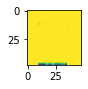

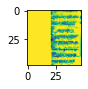

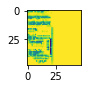

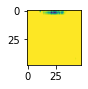

In [49]:
for i in range(4):
  plt.figure(figsize = (1, 1))
  plt.imshow(images[4][i])
  plt.grid(False)
  plt.show()

In [50]:
labels[0]

0

In [51]:
labels = to_categorical(labels)

In [52]:
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [53]:
images.shape

(37427, 4, 48, 48)

In [61]:
m = tf.keras.models.Sequential()
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(512, 3, activation = "relu" ), input_shape=(4, 48, 48, 1)))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D()))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(256, 3, activation = "relu")))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D()))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()))
m.add(tf.keras.layers.GlobalAveragePooling1D())
m.add(tf.keras.layers.Dense(1024, activation = "sigmoid"))
m.add(tf.keras.layers.Dropout(0.2))
m.add(tf.keras.layers.Dense(15, activation = "softmax"))

In [62]:
m.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_35 (TimeDi  (None, 4, 46, 46, 512)   5120      
 stributed)                                                      
                                                                 
 time_distributed_36 (TimeDi  (None, 4, 23, 23, 512)   0         
 stributed)                                                      
                                                                 
 time_distributed_37 (TimeDi  (None, 4, 23, 23, 512)   0         
 stributed)                                                      
                                                                 
 time_distributed_38 (TimeDi  (None, 4, 21, 21, 256)   1179904   
 stributed)                                                      
                                                                 
 time_distributed_39 (TimeDi  (None, 4, 10, 10, 256)  

In [63]:
m.compile(optimizer= "adam", loss = 'categorical_crossentropy',
              metrics = [ TruePositives(name='tp'), 
                         FalsePositives(name='fp'), 
                         TrueNegatives(name='tn'), 
                         FalseNegatives(name='fn'), 
                         "accuracy", 
                         Precision(name='precision'), 
                         Recall(name='recall'), 
                         AUC(name='auc')])

In [59]:
from keras.callbacks import TensorBoard, EarlyStopping
earlyStopping = EarlyStopping(monitor = 'loss', patience = 16, mode = 'min', restore_best_weights = True)

In [64]:
history = m.fit(images, labels, epochs=400, batch_size= 16, 
                callbacks =[earlyStopping])

Epoch 1/400
2340/2340 [==============================] - 173s 73ms/step - loss: 1.9226 - tp: 6904.0000 - fp: 2477.0000 - tn: 521501.0000 - fn: 30523.0000 - accuracy: 0.3895 - precision: 0.7360 - recall: 0.1845 - auc: 0.8414
Epoch 2/400
2340/2340 [==============================] - 171s 73ms/step - loss: 1.5966 - tp: 11099.0000 - fp: 3464.0000 - tn: 520514.0000 - fn: 26328.0000 - accuracy: 0.4968 - precision: 0.7621 - recall: 0.2966 - auc: 0.8957
Epoch 3/400
2340/2340 [==============================] - 171s 73ms/step - loss: 1.4525 - tp: 13386.0000 - fp: 3872.0000 - tn: 520106.0000 - fn: 24041.0000 - accuracy: 0.5414 - precision: 0.7756 - recall: 0.3577 - auc: 0.9146
Epoch 4/400
2340/2340 [==============================] - 171s 73ms/step - loss: 1.3376 - tp: 15381.0000 - fp: 4177.0000 - tn: 519801.0000 - fn: 22046.0000 - accuracy: 0.5778 - precision: 0.7864 - recall: 0.4110 - auc: 0.9279
Epoch 5/400
2340/2340 [==============================] - 171s 73ms/step - loss: 1.2449 - tp: 16708.00

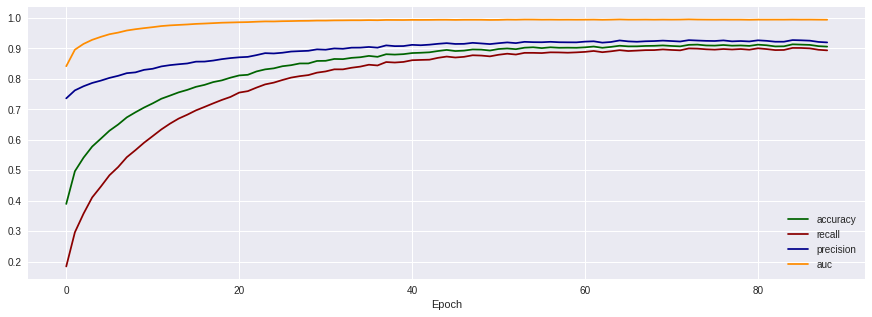

In [65]:
import matplotlib as mpl
mpl.style.use('seaborn')
plt.figure(figsize = (15, 5))
plt.plot(history.history['accuracy'], "darkgreen", label= "accuracy")
plt.plot(history.history['recall'], "darkred", label= "recall")
plt.plot(history.history['precision'], "darkblue", label= "precision")
plt.plot(history.history['auc'], "darkorange", label= "auc")
plt.xlabel('Epoch')
plt.legend()

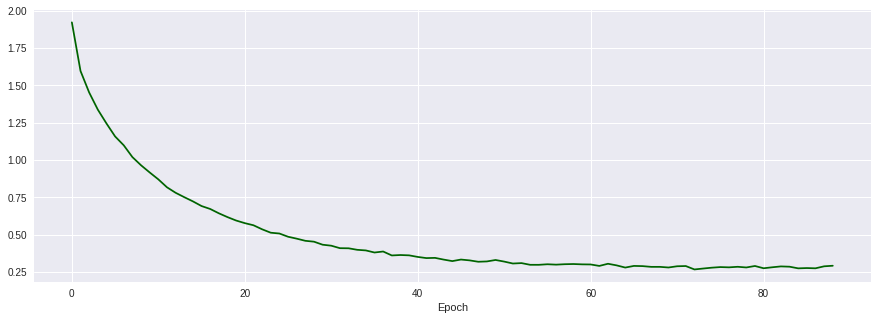

In [66]:
mpl.style.use('seaborn')
plt.figure(figsize = (15, 5))
plt.plot(history.history['loss'], "darkgreen", label= "accuracy")
plt.xlabel('Epoch')
plt.show()

In [69]:
m.evaluate(images, labels, batch_size=16)

2340/2340 [==============================] - 50s 21ms/step - loss: 0.0258 - tp: 37203.0000 - fp: 130.0000 - tn: 523848.0000 - fn: 224.0000 - accuracy: 0.9955 - precision: 0.9965 - recall: 0.9940 - auc: 0.9999


[0.025828829035162926,
 37203.0,
 130.0,
 523848.0,
 224.0,
 0.9954845309257507,
 0.9965178370475769,
 0.9940150380134583,
 0.9998602271080017]

In [67]:
y_pred = m.predict(images, batch_size=16, verbose= 1)
y_pred = np.argmax(y_pred, axis = 1)

2340/2340 [==============================] - 44s 19ms/step


In [70]:
y_test = np.argmax(labels, axis = 1)
y_test

array([ 0,  0,  0, ..., 14, 14, 14])

In [76]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, y_pred)

0.995484543244182

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2515
           1       0.99      1.00      1.00      2505
           2       1.00      1.00      1.00      2516
           3       0.99      1.00      0.99      2527
           4       0.99      1.00      0.99      2506
           5       1.00      1.00      1.00      2532
           6       1.00      0.99      0.99      2477
           7       1.00      1.00      1.00      2464
           8       1.00      1.00      1.00      2492
           9       1.00      0.99      1.00      2463
          10       1.00      0.99      0.99      2489
          11       0.99      1.00      1.00      2435
          12       1.00      1.00      1.00      2536
          13       1.00      0.99      0.99      2498
          14       1.00      1.00      1.00      2472

    accuracy                           1.00     37427
   macro avg       1.00      1.00      1.00     37427
weighted avg       1.00   

In [72]:
classes = list(range(15))
res = tf.math.confusion_matrix(y_pred,y_test).numpy()
cm = pd.DataFrame(res,
                     index = classes, 
                     columns = classes)
cm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2491,0,0,3,3,0,1,0,0,4,7,0,0,2,0
1,0,2496,0,2,1,1,4,1,0,1,3,0,0,0,0
2,0,0,2516,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,2516,0,0,1,1,0,1,8,0,0,4,0
4,2,3,0,2,2500,0,16,2,1,2,2,2,0,5,1
5,4,0,0,0,0,2527,0,2,2,1,1,0,0,0,1
6,0,1,0,0,1,0,2454,0,2,0,0,0,0,1,0
7,0,0,0,1,0,0,1,2455,0,1,0,1,0,1,0
8,1,0,0,0,0,0,0,1,2480,0,2,0,0,0,0
9,4,0,0,0,0,0,0,0,0,2447,0,0,0,0,0


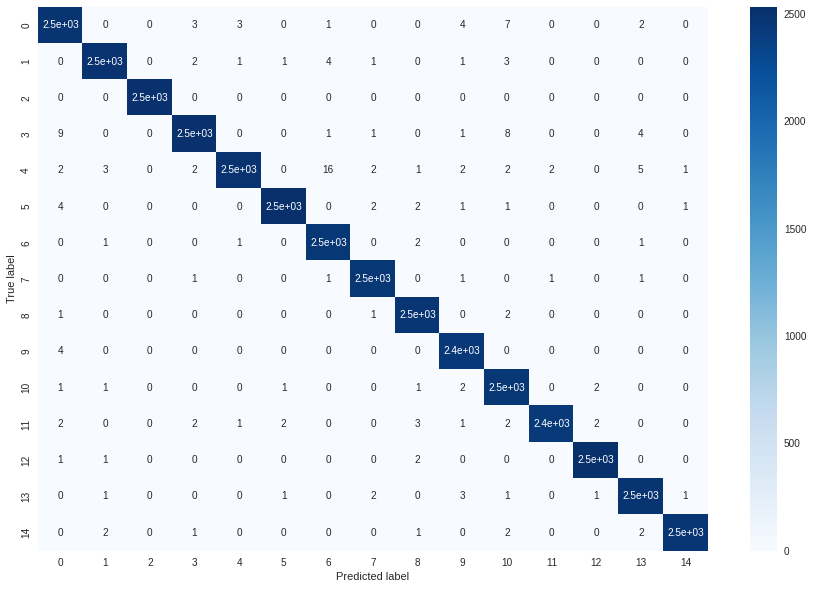

In [74]:
import seaborn as sns
figure = plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()